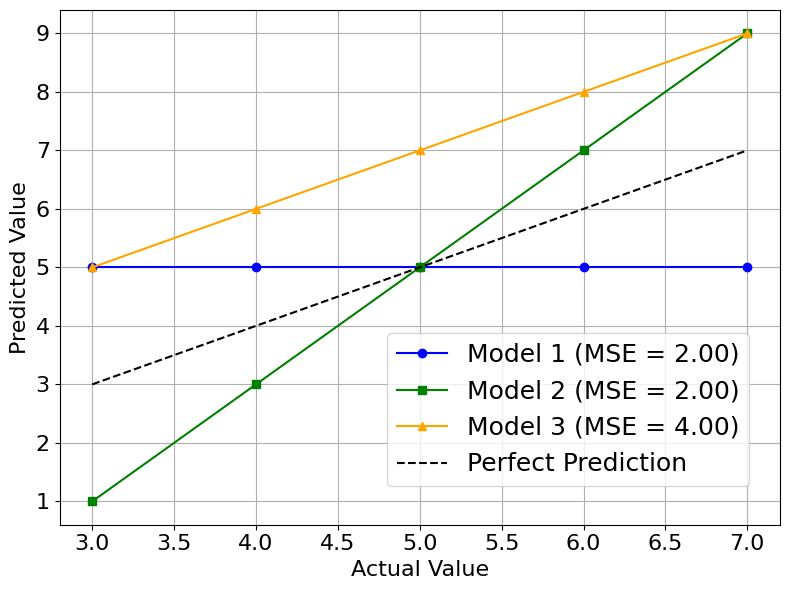

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data
actual = np.array([3, 4, 5, 6, 7])
model1 = np.array([5, 5, 5, 5, 5])
model2 = np.array([1, 3, 5, 7, 9])
model3 = np.array([5, 6, 7, 8, 9])
perfect = np.array([3, 4, 5, 6, 7])

# MSE calculations
mse1 = mean_squared_error(actual, model1)
mse2 = mean_squared_error(actual, model2)
mse3 = mean_squared_error(actual, model3)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(actual, model1, 'o-', color='blue', label=f'Model 1 (MSE = {mse1:.2f})')
plt.plot(actual, model2, 's-', color='green', label=f'Model 2 (MSE = {mse2:.2f})')
plt.plot(actual, model3, '^-', color='orange', label=f'Model 3 (MSE = {mse3:.2f})')
plt.plot(actual, perfect, 'k--', label='Perfect Prediction')

plt.xlabel('Actual Value', fontsize=16)
plt.ylabel('Predicted Value', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18, loc='lower right', bbox_to_anchor=(0.975, 0.05))
plt.grid(True)
plt.tight_layout()

# Save as SVG
plt.savefig("actual_vs_predicted_mse_plot_font16.svg", format='svg')
plt.show()


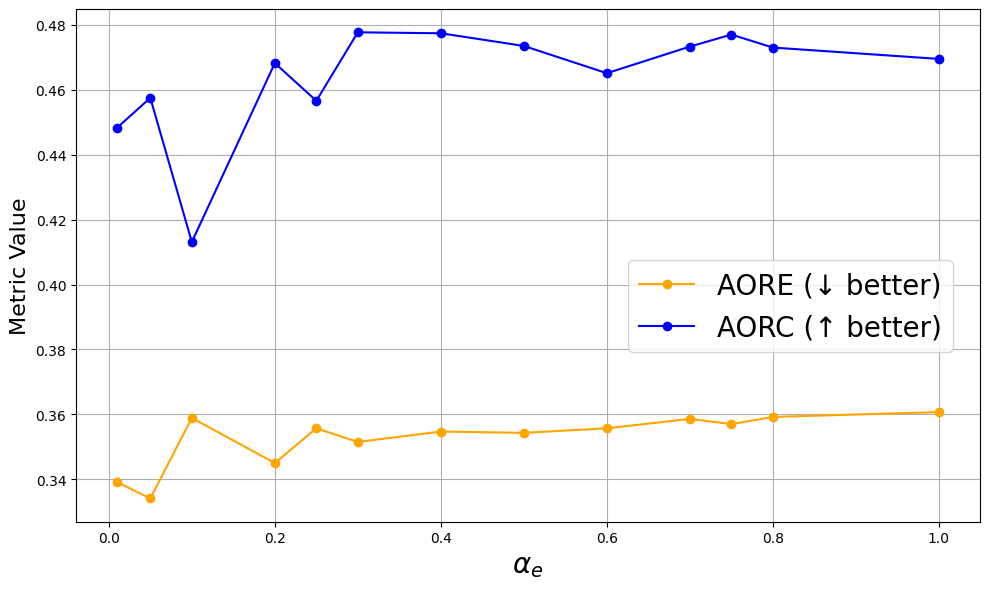

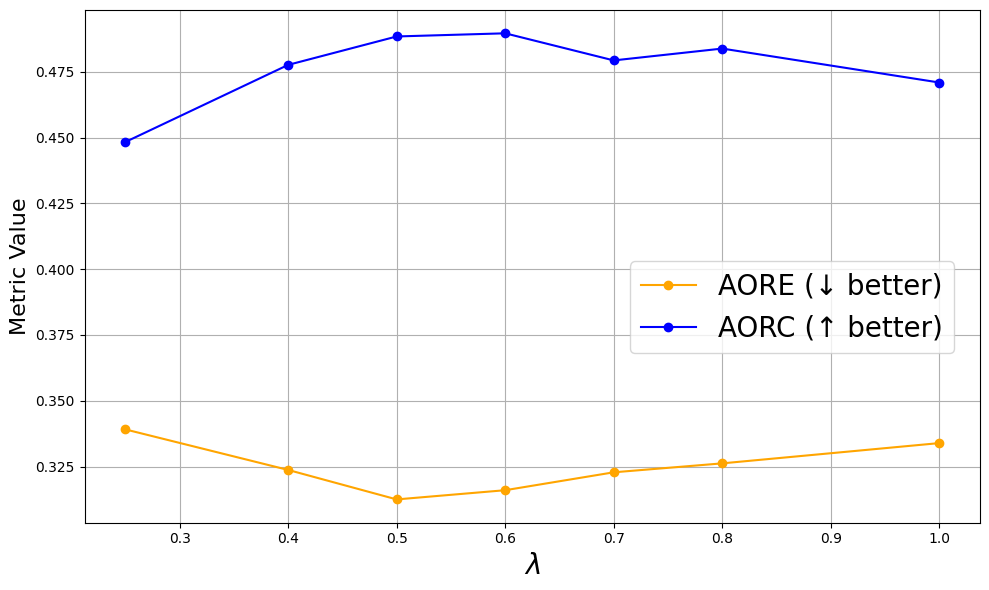

('aore_aorc_vs_alphae_cleaned.svg', 'aore_aorc_vs_lambda_cleaned.svg')

In [7]:
# Recreate both plots with no title, larger axis labels, and adjusted legend font size

# Define the alpha_e vs metric data
alpha_e_values_corrected = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 1.0]
aore_values_alphae = [0.3391, 0.3341, 0.3589, 0.3450, 0.3557, 0.3515, 0.3547, 0.3543, 0.3557, 0.3586, 0.3570, 0.3592, 0.3607]
aorc_values_alphae = [0.4483, 0.4575, 0.4131, 0.4682, 0.4566, 0.4777, 0.4774, 0.4735, 0.4651, 0.4733, 0.4770, 0.4730, 0.4695]

# Plot alpha_e vs AORE/AORC
plt.figure(figsize=(10, 6))
plt.plot(alpha_e_values_corrected, aore_values_alphae, marker='o', color='orange', label='AORE (↓ better)')
plt.plot(alpha_e_values_corrected, aorc_values_alphae, marker='o', color='blue', label='AORC (↑ better)')
plt.xlabel(r'$\alpha_e$', fontsize=20)
plt.ylabel('Metric Value', fontsize=16)
plt.legend(fontsize=20, loc='center', bbox_to_anchor=(0.79, 0.42))
plt.grid(True)
plt.tight_layout()
alphae_path = "aore_aorc_vs_alphae_cleaned.svg"
plt.savefig(alphae_path, format='svg')
plt.show()
plt.close()

# Lambda values and metrics
lambda_values_trimmed = [0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
aore_values_trimmed = [0.3391, 0.3237, 0.3125, 0.3160, 0.3228, 0.3262, 0.3339]
aorc_values_trimmed = [0.4483, 0.4776, 0.4884, 0.4896, 0.4793, 0.4838, 0.4709]

# Plot lambda vs AORE/AORC
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_trimmed, aore_values_trimmed, marker='o', color='orange', label='AORE (↓ better)')
plt.plot(lambda_values_trimmed, aorc_values_trimmed, marker='o', color='blue', label='AORC (↑ better)')
plt.xlabel(r'$\lambda$', fontsize=20)
plt.ylabel('Metric Value', fontsize=16)
plt.legend(fontsize=20, loc='center', bbox_to_anchor=(0.79, 0.42))
plt.grid(True)
plt.tight_layout()
lambda_path = "aore_aorc_vs_lambda_cleaned.svg"
plt.savefig(lambda_path, format='svg')
plt.show()
plt.close()

alphae_path, lambda_path
